# POP Projekt - Clearing i Crowding
## Filip Ryniewicz, Miłosz Cieśla

In [1]:
from testing_functions import ackley, rastrigin, rosenbrock
from plotting import  plt_all, plt_compare_diversity, plt_multiple_plots, plt_multiple_plots_side_by_side, table_compare_best, compare_evolutionary_parameter
from crowding import crowding
from clearing import clearing

## Funkcje Testowe

### Funkcja Ackleya

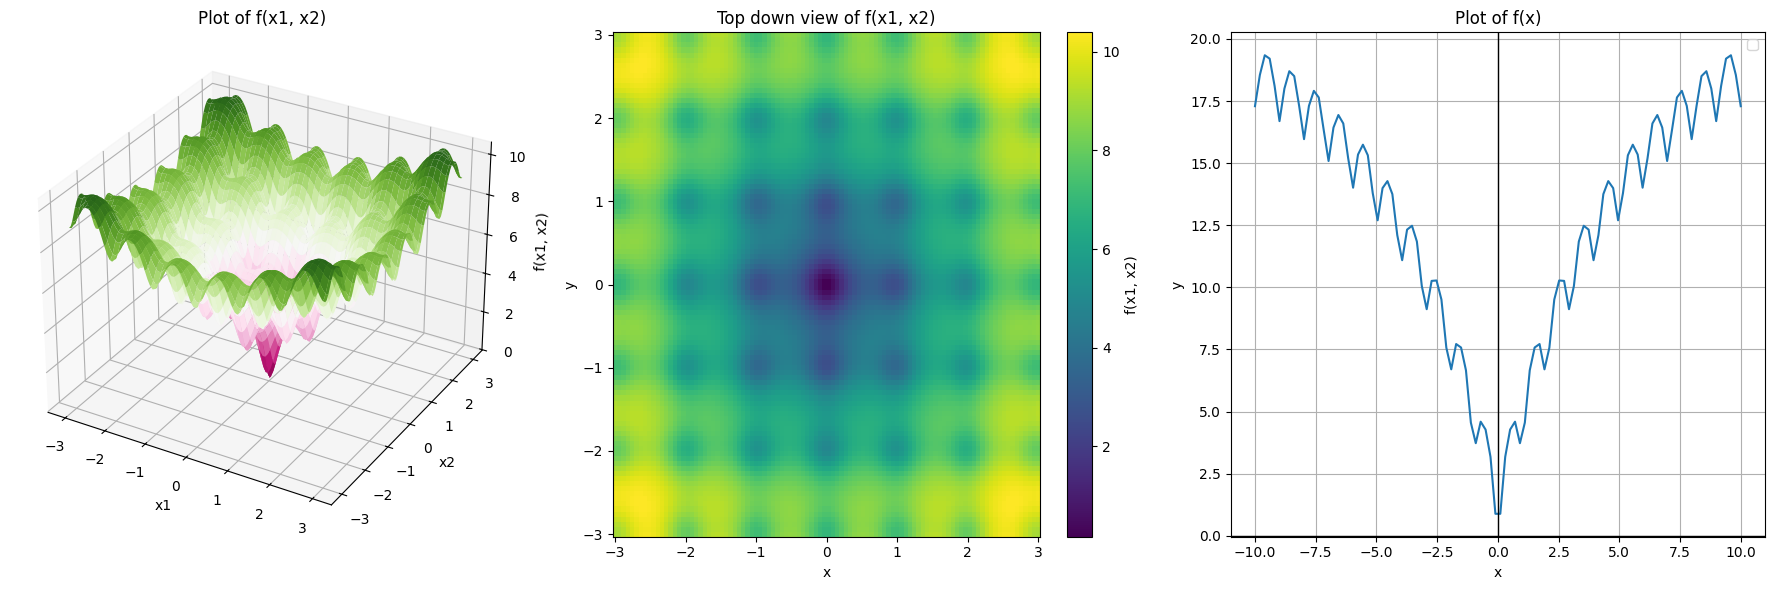

In [7]:
plt_all(ackley)

### Funkcja Rastrigina

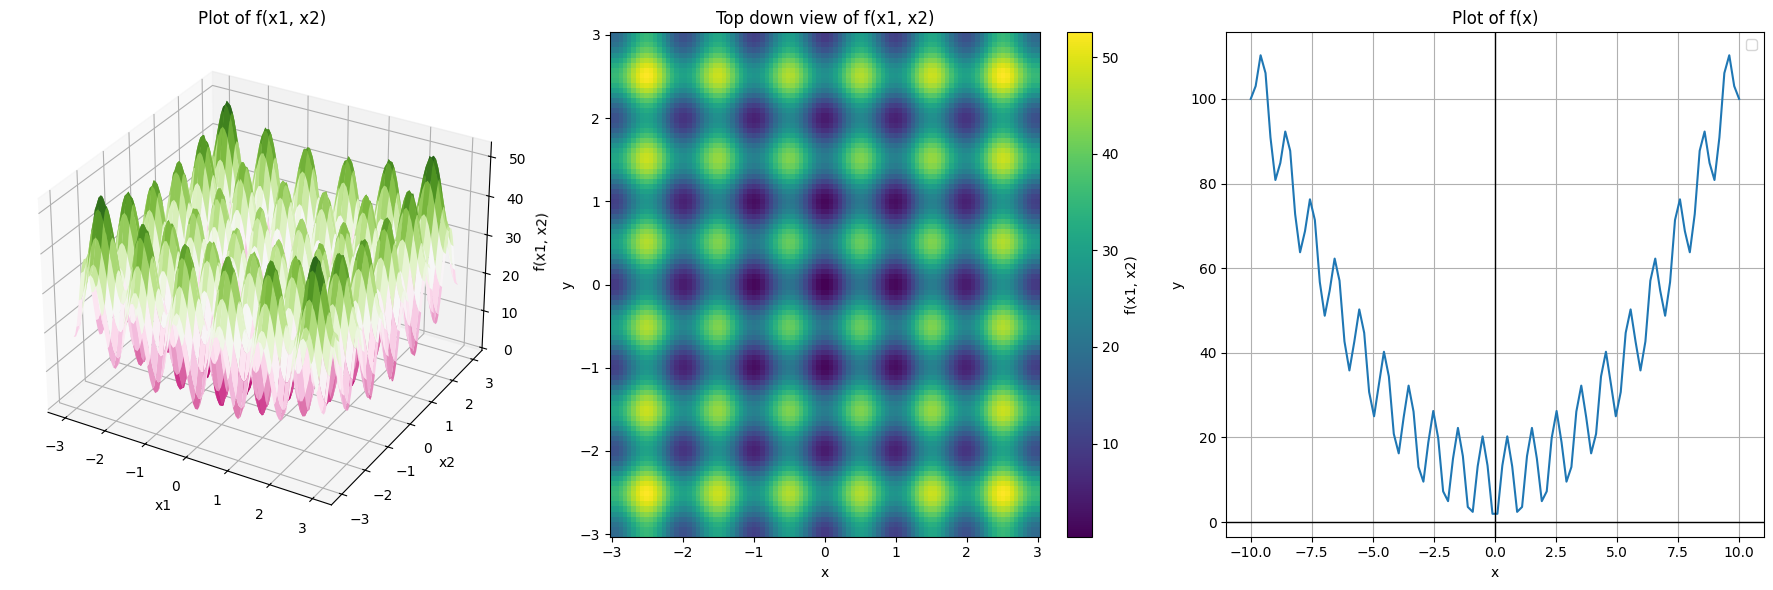

In [8]:
plt_all(rastrigin)

### Funkcja Rosenbrocka

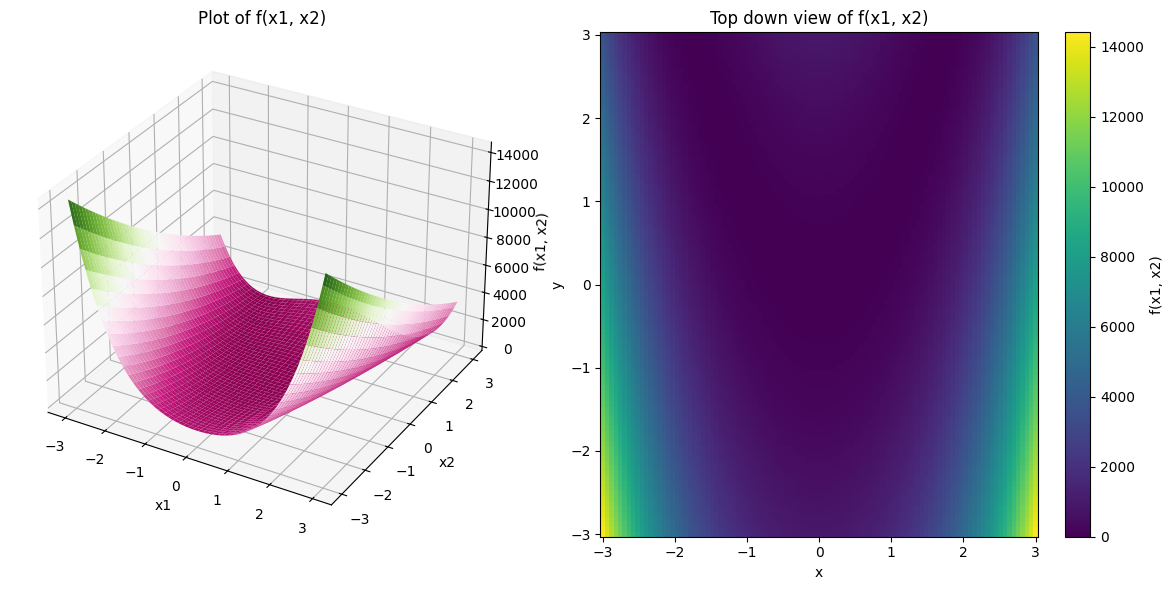

In [9]:
plt_all(rosenbrock, plot2D=False)

## Badanie wpływu wartości parametrów funkcji clearingu i crowdingu na działanie algorytmu

### Wpływ `cf_size` na crowding

Crowding factor w algorytmie crowdingu odpowiada za liczbę osobników z którymi potomek musi konkurować o miejsce w populacji. W tym eksperymencie sprawdzimy jak zachowuje się populacja w zależności od dobrania wartości tego parametru.

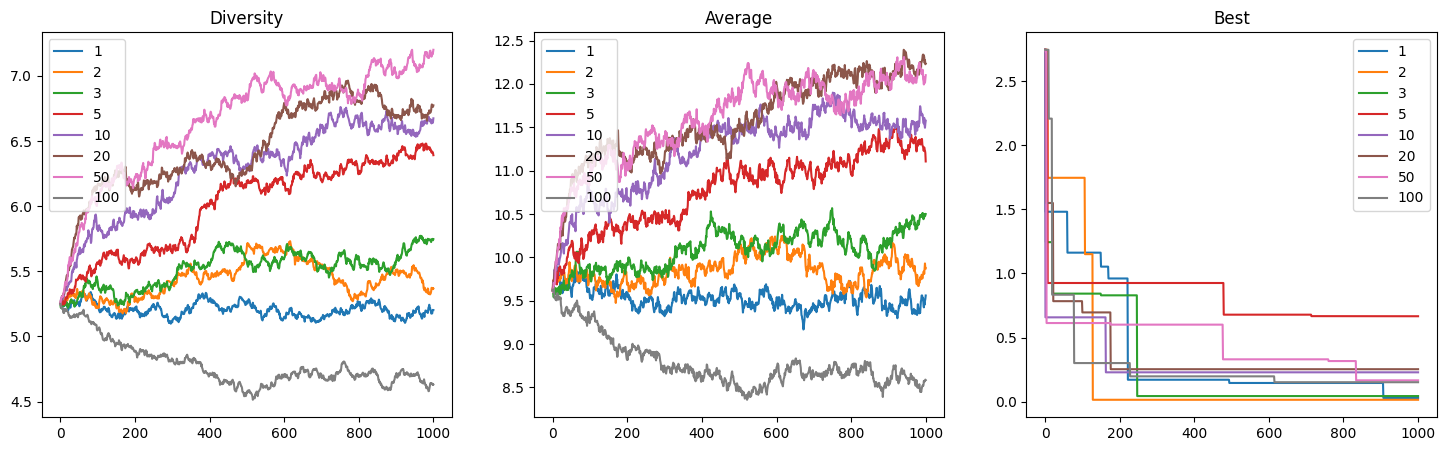

In [ ]:
cf_sizes = [1, 2, 3, 5, 10, 20, 50, 100]
diversities, averages, best_scores, best_individuals = compare_evolutionary_parameter(ackley, cf_sizes, 'cf_size', crowding)
plt_multiple_plots_side_by_side([diversities, averages, best_scores], cf_sizes, titles=["Diversity", "Average", "Best"])

df = table_compare_best(best_individuals, cf_sizes)
df.T

### Wpływ `distance_threshold` na crowding

3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.1
3 0.

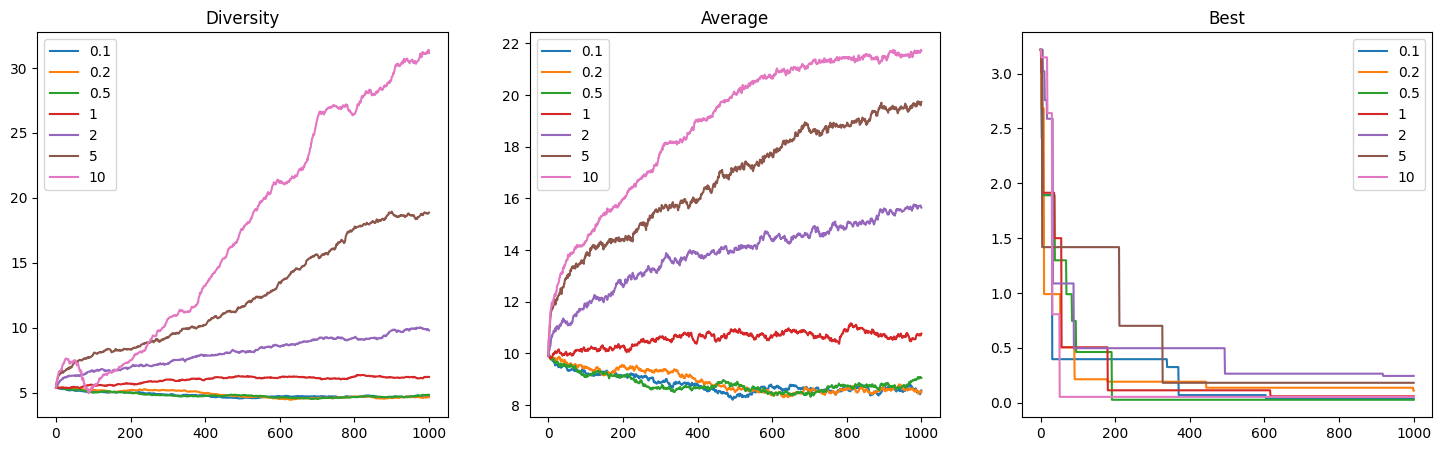

In [2]:
distance_thresholds = [0.1, 0.2, 0.5, 1, 2, 5, 10]
diversities, averages, best_scores, best_individuals = compare_evolutionary_parameter(ackley, distance_thresholds, 'crowding_threshold', crowding)
plt_multiple_plots_side_by_side([diversities, averages, best_scores], distance_thresholds, titles=["Diversity", "Average", "Best"])

df = table_compare_best(best_individuals, distance_thresholds)
df.T

### Wpływ `clearing_radius` na clearing

Średnia populacji jest nieproporcjonalnie wysoka z uwagi na to, że osobniki oznaczone jako cleared mają score ustawiany na 10000.

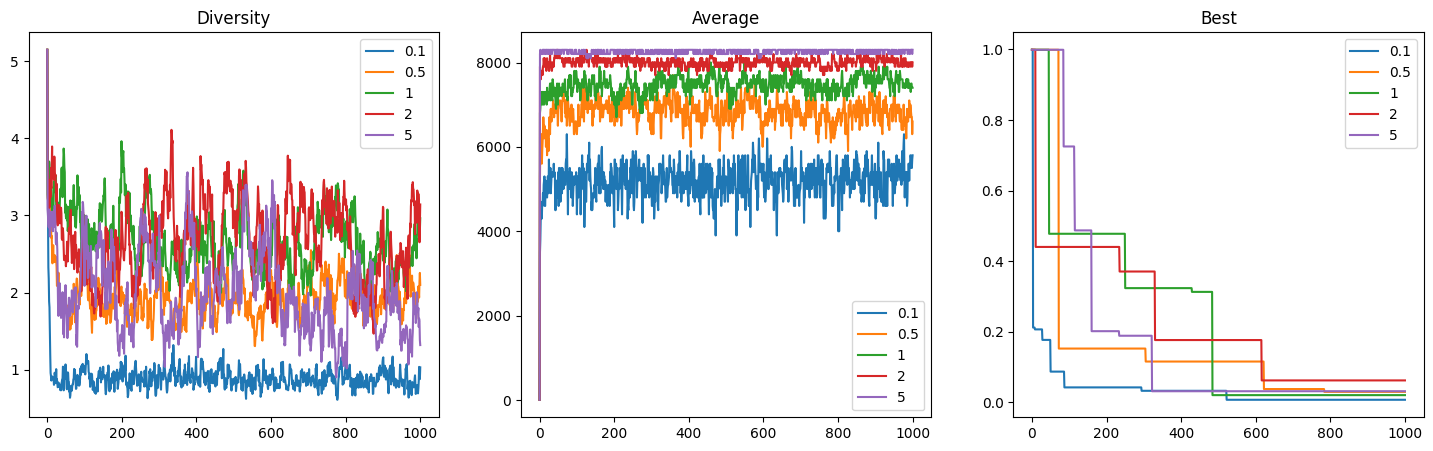

,x,y,score
0.1,0.001631,-0.001939,0.007336
0.5,-0.005982,0.007570,0.029765
1.0,-0.003814,-0.005644,0.020504
2.0,0.013376,0.013073,0.062194
5.0,0.006085,-0.008157,0.031541


In [3]:
clearing_radiuses = [0.1, 0.5, 1, 2, 5]
diversities, averages, best_scores, best_individuals = compare_evolutionary_parameter(ackley, clearing_radiuses, 'clearing_radius', clearing)
plt_multiple_plots_side_by_side([diversities, averages, best_scores], clearing_radiuses, titles=["Diversity", "Average", "Best"])

df = table_compare_best(best_individuals, clearing_radiuses)
df.T

In [ ]:
niche_capacities = [1, 2, 3, 5, 10, 20, 50, 100]
diversities, averages, best_scores, best_individuals = compare_evolutionary_parameter(ackley, clearing_radiuses, 'clearing_radius', clearing)
plt_multiple_plots_side_by_side([diversities, averages, best_scores], clearing_radiuses, titles=["Diversity", "Average", "Best"])

df = table_compare_best(best_individuals, clearing_radiuses)
df.T